## Make_import

In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Fetch_data

In [4]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
fetch_data = requests.get(url)
# TODO: Create a `BeautifulSoup` instance with that data
soup = BeautifulSoup(fetch_data.content,"html.parser")

In [8]:
books = soup.find_all("article",class_="product_pod")
len(books)

20

## Parsing_one_book

In [18]:
book_title = books[0].find("h3").find("a").attrs["title"]

In [28]:
book_price = float(books[0].find("div", class_="product_price").find("p", class_="price_color").string[1:])

In [46]:
book_stars = books[0].find("p", class_="star-rating").attrs["class"]
book_stars

['star-rating', 'Three']

In [41]:
def parse_rating(rating_classes):
    dict_ratg = {
                "One":1,
                "Two":2,
                "Three":3,
                "Four":4,
                "Five":5
                }
    return int(''.join([str(v) for k, v in dict_ratg.items() if k in rating_classes]))

In [42]:
parse_rating(book_stars)

3

## Parsing_all_books

In [52]:
books_dict = {"title":[], "price":[], "rating":[]}
for book in books:
    books_dict["title"].append(book.find("h3").find("a").attrs["title"])
    books_dict["price"].append(float(book.find("p", class_="price_color").string[1:]))
    books_dict["rating"].append(parse_rating(book.find("p", class_="star-rating").attrs["class"]))
    

In [55]:
len(books_dict["title"])

20

## Loading_data_in_pandas

In [59]:
books_df=pd.DataFrame.from_dict(books_dict)

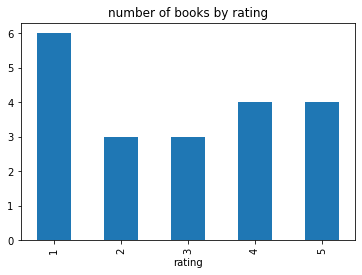

In [63]:
books_df.groupby("rating").count()["title"].plot(kind="bar");
plt.title("number of books by rating");

## Going_through_all_pages

In [71]:
all_books={"title":[],"price":[],"rating":[]}

max_pages=5
for page in range(1,max_pages+1):
    print(f"parsing page {page}...")
    url=f"http://books.toscrape.com/catalogue/page-{page}.html"
    fetch_data_by_page=requests.get(url)
    soup_by_page=BeautifulSoup(fetch_data.content,"html.parser")
    
    for book in soup_by_page.find_all("article",class_="product_pod"):
        all_books["title"].append(book.find("h3").find("a").attrs["title"])
        all_books["price"].append(float(book.find("p", class_="price_color").string[1:]))
        all_books["rating"].append(parse_rating(book.find("p", class_="star-rating").attrs["class"]))
        
all_books

parsing page 1...
parsing page 2...
parsing page 3...
parsing page 4...
parsing page 5...


{'title': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas",
  'A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Li

In [73]:
len(all_books["title"])

100

In [76]:
all_books_df=pd.DataFrame.from_dict(all_books)
all_books_df.tail()

,title,price,rating
95,Our Band Could Be Your Life: Scenes from the A...,57.25,3
96,Olio,23.88,1
97,Mesaerion: The Best Science Fiction Stories 18...,37.59,1
98,Libertarianism for Beginners,51.33,2
99,It's Only the Himalayas,45.17,2


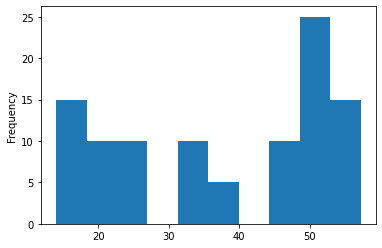

In [80]:
all_books_df["price"].plot(kind="hist");

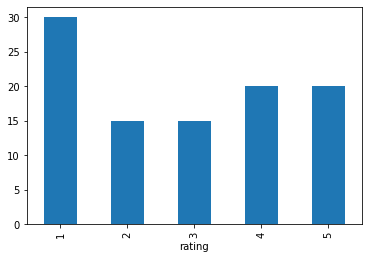

In [83]:
all_books_df.groupby("rating").count()["title"].plot(kind="bar");

**saving the data for later use**

In [84]:
all_books_df.to_csv("books.csv")

In [85]:
all_books_df.to_excel('books.xlsx', sheet_name='Books')